## STAT 457, Proj 2
### Yun Kyaw, 20177325

In [3]:
# Setting up the data set and importing important packages
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import pandas as pd
import researchpy as rp
import scipy.stats as stats
from scipy.stats import skew, norm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import numpy as np
import seaborn as sns

In [4]:
train_data = pd.read_csv("W23P2_train.csv",encoding='latin1')
test_data = pd.read_csv("W23P2_test.csv",encoding='latin1')

#### Exploratory Data Analysis

In [5]:
train_data.head(10)  # looking at the top 10 rows of the dataset
train_data.tail(10)  # looking at the bottom 10 rows of the dataset
train_data.info()  # looking at the columns of the dataset and their object types
train_data.isna().sum() # column-wise summary of missing values

,interest_level,bathrooms,bedrooms,latitude,longitude,price,street_address,Dining.Room,Pre.War,Laundry.in.Building,...,Exposed.Brick,building.common.outdoor.space,garden,Washer.Dryer.in.Unit,Private.Deck,Shares.OK,gym,Private.outdoor.space,Gym.In.Building,Common.garden
0,medium,1.0,4,40.7831,-73.9449,3675,1962 First Avenue,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,medium,1.0,3,40.7542,-73.9724,3600,155 East 47th Street,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,medium,1.0,2,40.7285,-73.9790,2900,206 Avenue B,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,medium,2.0,4,40.7306,-73.9837,7200,352 E 13 St,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,high,1.0,1,40.7645,-73.9840,2500,260 W 54 St.,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,high,1.0,0,40.7419,-73.9776,2195,530 Second Avenue,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,medium,1.0,1,40.8260,-73.8543,1495,2040 Bruckner Boulevard,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,high,1.0,2,40.7285,-73.9805,3000,516 E 12th St,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,low,1.0,1,40.7721,-73.9861,5000,160 W 62 St.,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9,high,1.0,1,40.6983,-73.9929,2100,75 Pineapple Street,0,1,0,...,0,0,0,0,0,0,0,0,0,0


,interest_level,bathrooms,bedrooms,latitude,longitude,price,street_address,Dining.Room,Pre.War,Laundry.in.Building,...,Exposed.Brick,building.common.outdoor.space,garden,Washer.Dryer.in.Unit,Private.Deck,Shares.OK,gym,Private.outdoor.space,Gym.In.Building,Common.garden
9836,low,1.0,2,40.7935,-73.9399,2000,2156 Second Avenue,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9837,medium,1.0,2,40.7585,-73.9913,3550,350 West 43rd Street,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9838,high,1.0,3,40.7084,-74.0151,3725,90 Rector Street,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9839,medium,1.0,2,40.7385,-73.9804,2950,second ave and 24 st,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9840,low,1.0,0,40.7841,-73.9487,2390,235 East 95th Street,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9841,low,1.0,2,40.7628,-73.9849,3495,245 West 51st Street,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9842,low,3.0,3,40.7162,-74.0155,10600,211 North End Ave.,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9843,high,2.0,2,40.7783,-73.9836,2325,228 WEST 71 STREET,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9844,low,1.0,0,40.7426,-73.9808,2650,154 E 29 Street,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9845,low,1.0,1,40.7651,-73.9874,2550,796 9 Ave.,0,1,0,...,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9846 entries, 0 to 9845
Columns: 170 entries, interest_level to Common.garden
dtypes: float64(3), int64(165), object(2)
memory usage: 12.8+ MB


interest_level           0
bathrooms                0
bedrooms                 0
latitude                 0
longitude                0
                        ..
Shares.OK                0
gym                      0
Private.outdoor.space    0
Gym.In.Building          0
Common.garden            0
Length: 170, dtype: int64

We find that there are 170 columns, and 9847 entries in the training dataset

In [6]:
test_data.head(10)  # looking at the top 10 rows of the dataset
test_data.tail(10)  # looking at the bottom 10 rows of the dataset
test_data.info()  # looking at the columns of the dataset and their object types
test_data.isna().sum() # column-wise summary of missing values

,ID,bathrooms,bedrooms,latitude,longitude,price,street_address,Dining.Room,Pre.War,Laundry.in.Building,...,Exposed.Brick,building.common.outdoor.space,garden,Washer.Dryer.in.Unit,Private.Deck,Shares.OK,gym,Private.outdoor.space,Gym.In.Building,Common.garden
0,1,1.0,0,40.7769,-73.9467,1945,1661 York Avenue,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1.0,0,40.7610,-73.9990,2400,620 West 42nd Street,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,1.0,2,40.7528,-73.9709,3750,235 E 46 Street,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1.0,3,40.7360,-73.9860,4450,170 East 18th Street,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1.0,2,40.7084,-74.0048,5425,Cliff Street,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,1.0,4,40.8031,-73.9653,5200,225 West 109th Street,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,7,1.0,1,40.7185,-73.9865,2900,99 Suffolk Street,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,8,2.0,3,40.6765,-73.9524,2850,35 Rogers Ave,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,1.0,2,40.7221,-73.9806,3200,43 Avenue C,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,1.0,1,40.7534,-73.9368,2075,27-37 27th Street,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,ID,bathrooms,bedrooms,latitude,longitude,price,street_address,Dining.Room,Pre.War,Laundry.in.Building,...,Exposed.Brick,building.common.outdoor.space,garden,Washer.Dryer.in.Unit,Private.Deck,Shares.OK,gym,Private.outdoor.space,Gym.In.Building,Common.garden
6554,6555,1.0,1,40.7744,-73.9508,2379,1582 1st Ave.,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6555,6556,1.0,1,40.6368,-73.9722,2175,483 Ocean Pkwy,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6556,6557,1.0,2,40.7955,-73.9481,2695,E 109TH ST AND MADISON AVE,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6557,6558,1.0,2,40.7243,-73.9912,5400,21 East 1st Street,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6558,6559,1.0,2,40.7681,-73.9563,3995,355 E 72nd St.,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6559,6560,1.0,2,40.7564,-73.9969,2795,447 West 37th Street,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6560,6561,2.0,3,40.7516,-73.9717,5000,245 E 44th St.,1,0,1,...,0,0,0,0,0,0,0,0,0,0
6561,6562,1.0,1,40.5765,-73.9554,1850,210 Brighton 15th St,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6562,6563,1.0,2,40.7448,-74.0017,4195,350 West 21st Street,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6563,6564,1.0,3,40.7594,-73.9712,4280,123 E 54th St,1,0,1,...,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6564 entries, 0 to 6563
Columns: 170 entries, ID to Common.garden
dtypes: float64(3), int64(166), object(1)
memory usage: 8.5+ MB


ID                       0
bathrooms                0
bedrooms                 0
latitude                 0
longitude                0
                        ..
Shares.OK                0
gym                      0
Private.outdoor.space    0
Gym.In.Building          0
Common.garden            0
Length: 170, dtype: int64

We observe the same in the testing dataset, though this dataset includes an ID column, which we may remove. Additionally, we find the street address column, and may remove this as it may be arbitrary to our results.

In [7]:
# Removing street_address
train_data = train_data.drop(columns = ['street_address'])

test_data = test_data.drop(columns = ['street_address'])

test_data = test_data.drop(columns = ['ID'])

#### Detecting Multicollinearity

In [8]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [9]:
x_variables = train_data.drop(columns = ['interest_level'])

vif_data = pd.DataFrame()
vif_data['feature'] = x_variables.columns
vif_data['VIF'] = [variance_inflation_factor(x_variables.values, i)
                   for i in range(len(x_variables.columns))]

# Finding the columns with the highest multicollinearity
high_multicol = vif_data.loc[vif_data['VIF'] > 4]
print(high_multicol)

/Users/yunkyaw/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/yunkyaw/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


                           feature           VIF
0                        bathrooms  1.211367e+01
1                         bedrooms  4.504123e+00
2                         latitude  4.841767e+05
3                        longitude  4.842830e+05
8                       Dishwasher  4.015943e+00
9                  Hardwood.Floors  4.412555e+00
10                    Dogs.Allowed  1.276127e+01
11                    Cats.Allowed  1.345539e+01
13                        Elevator  4.351352e+00
40                          prewar  1.477652e+02
41                         LOWRISE  2.806355e+01
43                         SIMPLEX  3.218785e+02
44                        HARDWOOD  1.290880e+02
50                   High.Ceilings  4.969738e+00
51                 Hardwood.floors  4.043701e+00
69                  Washer.in.Unit           inf
70                   Dryer.in.Unit           inf
73                          Subway  5.307920e+00
75                        Hardwood  1.113308e+01
76                  

In [19]:
## considering the large amount of multicollinearity in the dataset, we will determine if there are repeated columns in the training set
repeats = []

for col in train_data:
    for col1 in train_data:
        if col != col1:
            if train_data[col].equals(train_data[col1]):
                repeats.append([col, col1])


## and again in the testing set
repeats1 = []

for col in test_data:
    for col1 in test_data:
        if col != col1:
            if test_data[col].equals(test_data[col1]):
                repeats1.append([col, col1])

## print the rows in common
for row in range(len(repeats)):
    for row1 in range(len(repeats1)):
        gfd = repeats[row] == repeats1[row1]
        if gfd == True:
            print(repeats[row])

['Washer.in.Unit', 'Dryer.in.Unit']
['Dryer.in.Unit', 'Washer.in.Unit']
['assigned.parking.space', 'Private.parking']
['Private.parking', 'assigned.parking.space']
['FT.Doorman', 'Full.Service.Garage']
['FT.Doorman', 'Washer.Dryer.in.building']
['FT.Doorman', 'Outdoor.Entertainment.Space']
['FT.Doorman', 'Live.In.Superintendent']
['Hi.Rise', 'In.Unit.Washer.Dryer']
['Full.Service.Garage', 'FT.Doorman']
['Full.Service.Garage', 'Washer.Dryer.in.building']
['Full.Service.Garage', 'Outdoor.Entertainment.Space']
['Full.Service.Garage', 'Live.In.Superintendent']
['Washer.Dryer.in.building', 'FT.Doorman']
['Washer.Dryer.in.building', 'Full.Service.Garage']
['Washer.Dryer.in.building', 'Outdoor.Entertainment.Space']
['Washer.Dryer.in.building', 'Live.In.Superintendent']
['Outdoor.Entertainment.Space', 'FT.Doorman']
['Outdoor.Entertainment.Space', 'Full.Service.Garage']
['Outdoor.Entertainment.Space', 'Washer.Dryer.in.building']
['Outdoor.Entertainment.Space', 'Live.In.Superintendent']
['In.Uni

In [20]:
# combining Full.Service.Garage, FT.Doorman, Live.In.Superintendent
train_df = train_data.drop(columns = ['Washer.in.Unit'])
train_df = train_df.rename(columns = {"Dryer.in.Unit": "Wash.Dry.in.Unit"})

# combining assigned.parking.space and Private.parking
train_df = train_df.drop(columns = ['assigned.parking.space'])

# combining Full.Service.Garage, FT.Doorman, Live.In.Superintendent
train_df = train_df.drop(columns = ['FT.Doorman', 'Live.In.Superintendent'])
train_df = train_df.rename(columns = {"Full.Service.Garage": "FT.Service"})

# combining Washer.Dryer.in.building, and Outdoor.Entertainment.Space
train_df = train_df.drop(columns = ['Washer.Dryer.in.building'])
train_df = train_df.rename(columns = {"Outdoor.Entertainment.Space": "Communal.Amenities"})

# combining private.balcony and Private.balcony
train_df = train_df.drop(columns = ['Private.balcony'])

In [21]:
# combining Full.Service.Garage, FT.Doorman, Live.In.Superintendent
test_df = test_data.drop(columns = ['Washer.in.Unit'])
test_df = test_df.rename(columns = {"Dryer.in.Unit": "Wash.Dry.in.Unit"})

# combining assigned.parking.space and Private.parking
test_df = test_df.drop(columns = ['assigned.parking.space'])

# combining Full.Service.Garage, FT.Doorman, Live.In.Superintendent
test_df = test_df.drop(columns = ['FT.Doorman', 'Live.In.Superintendent'])
test_df = test_df.rename(columns = {"Full.Service.Garage": "FT.Service"})

# combining Full.Service.Garage, FT.Doorman, Live.In.Superintendent
test_df = test_df.drop(columns = ['Washer.Dryer.in.building'])
test_df = test_df.rename(columns = {"Outdoor.Entertainment.Space": "Communal.Amenities"})

# combining private.balcony and Private.balcony
test_df = test_df.drop(columns = ['Private.balcony'])

In [25]:
# combining Dogs.Allowed, and Cats.Allowed
for row in train_df['Dogs.Allowed']:
    if train_df['Cats.Allowed'][row] == 1:
        train_df['Dogs.Allowed'][row] = 1
train_df = train_df.drop(columns = ['Cats.Allowed'])
train_df = train_df.rename(columns = {"Dogs.Allowed": "Pets.Allowed"})

# combining Hardwood, and HARDWOOD
for row in train_df['Hardwood']:
        if train_df['HARDWOOD'][row] == 1:
             train_df['Hardwood'] = 1
train_df = train_df.drop(columns = ['HARDWOOD'])

In [26]:
# combining Dogs.Allowed, and Cats.Allowed
for row in test_df['Dogs.Allowed']:
    if test_df['Cats.Allowed'][row] == 1:
        test_df['Dogs.Allowed'][row] = 1
test_df = test_df.drop(columns = ['Cats.Allowed'])
test_df = test_df.rename(columns = {"Dogs.Allowed": "Pets.Allowed"})

# combining Hardwood, and HARDWOOD
for row in test_df['Hardwood']:
        if test_df['HARDWOOD'][row] == 1:
             test_df['Hardwood'] = 1
test_df = test_df.drop(columns = ['HARDWOOD'])

In [24]:
# Determining if there are colums with only 0
train_data.loc[:, (train_data == 0).all()]
test_data.loc[:, (test_data == 0).all()]


,Eat.In.Kitchen
0,0
1,0
2,0
3,0
4,0
...,...
9841,0
9842,0
9843,0
9844,0


,assigned.parking.space,Private.parking,Hi.Rise,In.Unit.Washer.Dryer,On.site.Parking.Lot
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
6559,0,0,0,0,0
6560,0,0,0,0,0
6561,0,0,0,0,0
6562,0,0,0,0,0


In [27]:
# verifying the multicollinearity
x_variables = train_df.drop(columns = ['interest_level'])

vif_data = pd.DataFrame()
vif_data['feature'] = x_variables.columns
vif_data['VIF'] = [variance_inflation_factor(x_variables.values, i)
                   for i in range(len(x_variables.columns))]

# Finding the columns with the highest multicollinearity
high_multicol = vif_data.loc[vif_data['VIF'] > 4]
print(high_multicol)


/Users/yunkyaw/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/Users/yunkyaw/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                           feature           VIF
0                        bathrooms  1.211361e+01
1                         bedrooms  4.503494e+00
2                         latitude  4.841413e+05
3                        longitude  4.842442e+05
8                       Dishwasher  4.015869e+00
9                  Hardwood.Floors  4.410860e+00
12                        Elevator  4.351196e+00
39                          prewar  1.477551e+02
40                         LOWRISE  2.806213e+01
42                         SIMPLEX  1.926058e+02
48                   High.Ceilings  4.961950e+00
49                 Hardwood.floors  4.043427e+00
70                          Subway  5.306975e+00
72                        Hardwood  1.113307e+01
73                       Renovated  9.259723e+00
74                     Marble.Bath  1.236175e+01
75                 Granite.Kitchen  1.051363e+01
76                           Light  9.001083e+00
85                            WiFi  4.180333e+00
86                  

In [28]:
# Finding the columns with the highest multicollinearity
high_multicol = vif_data.loc[vif_data['VIF'] > 100]
print(high_multicol)

                  feature           VIF
2                latitude  4.841413e+05
3               longitude  4.842442e+05
39                 prewar  1.477551e+02
42                SIMPLEX  1.926058e+02
125               Hi.Rise           inf
127            FT.Service           inf
130    Communal.Amenities           inf
131  In.Unit.Washer.Dryer           inf


### Adjusting for Skewness
In this section, we will adjust for skewness in the columns that are not one-hot encoded

In [29]:
skew_df = train_df.drop(columns = ['interest_level'])
skew_df.loc[:, (skew_df > 1).any()]
skew_df.loc[:, (skew_df < 0).any()]

,bathrooms,bedrooms,latitude,price
0,1.0,4,40.7831,3675
1,1.0,3,40.7542,3600
2,1.0,2,40.7285,2900
3,2.0,4,40.7306,7200
4,1.0,1,40.7645,2500
...,...,...,...,...
9841,1.0,2,40.7628,3495
9842,3.0,3,40.7162,10600
9843,2.0,2,40.7783,2325
9844,1.0,0,40.7426,2650


,longitude
0,-73.9449
1,-73.9724
2,-73.9790
3,-73.9837
4,-73.9840
...,...
9841,-73.9849
9842,-74.0155
9843,-73.9836
9844,-73.9808


Thus, we may skew-adjust the columns bedrooms, bathrooms, and price

In [30]:
## Adjusting for skewness
skew_df = skew_df[['bathrooms', 'bedrooms', 'price']]
skewness = skew_df.skew().sort_values(ascending=False)
skewed_cols = list(skewness[abs(skewness) > 1].index)

# Log-transform skewed columns
for col in skewed_cols:
        train_df[col] = np.log(1 + train_df[col])

In [31]:
print(skewed_cols)

['price', 'bathrooms']


In [34]:
## Adjusting for skewness in the testing dataset
skew_df1 = test_df
skew_df1.loc[:, (skew_df1 > 1).any()]
skew_df1.loc[:, (skew_df1 < 0).any()]
skew_df1 = skew_df1[['bathrooms', 'bedrooms', 'price']]
skewness1 = skew_df1.skew().sort_values(ascending=False)
skewed_cols1 = list(skewness1[abs(skewness1) > 1].index)
# if was found that the skewed columns are also price and bathrooms

# Log-transform skewed columns
for col in skewed_cols1:
        test_df[col] = np.log(1 + test_df[col])

,bathrooms,bedrooms,latitude,price
0,1.0,0,40.7769,1945
1,1.0,0,40.7610,2400
2,1.0,2,40.7528,3750
3,1.0,3,40.7360,4450
4,1.0,2,40.7084,5425
...,...,...,...,...
6559,1.0,2,40.7564,2795
6560,2.0,3,40.7516,5000
6561,1.0,1,40.5765,1850
6562,1.0,2,40.7448,4195


,longitude
0,-73.9467
1,-73.9990
2,-73.9709
3,-73.9860
4,-74.0048
...,...
6559,-73.9969
6560,-73.9717
6561,-73.9554
6562,-74.0017


In [35]:
test_df.head(10)
train_df.head(10)

,bathrooms,bedrooms,latitude,longitude,price,Dining.Room,Pre.War,Laundry.in.Building,Dishwasher,Hardwood.Floors,...,Exposed.Brick,building.common.outdoor.space,garden,Washer.Dryer.in.Unit,Private.Deck,Shares.OK,gym,Private.outdoor.space,Gym.In.Building,Common.garden
0,0.693147,0,40.7769,-73.9467,7.573531,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0.693147,0,40.7610,-73.9990,7.783641,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0.693147,2,40.7528,-73.9709,8.229778,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.693147,3,40.7360,-73.9860,8.400884,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.693147,2,40.7084,-74.0048,8.598957,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.693147,4,40.8031,-73.9653,8.556606,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.693147,1,40.7185,-73.9865,7.972811,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1.098612,3,40.6765,-73.9524,7.955425,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.693147,2,40.7221,-73.9806,8.071219,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0.693147,1,40.7534,-73.9368,7.638198,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,interest_level,bathrooms,bedrooms,latitude,longitude,price,Dining.Room,Pre.War,Laundry.in.Building,Dishwasher,...,Exposed.Brick,building.common.outdoor.space,garden,Washer.Dryer.in.Unit,Private.Deck,Shares.OK,gym,Private.outdoor.space,Gym.In.Building,Common.garden
0,medium,0.693147,4,40.7831,-73.9449,8.209580,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,medium,0.693147,3,40.7542,-73.9724,8.188967,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,medium,0.693147,2,40.7285,-73.9790,7.972811,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,medium,1.098612,4,40.7306,-73.9837,8.881975,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,high,0.693147,1,40.7645,-73.9840,7.824446,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,high,0.693147,0,40.7419,-73.9776,7.694393,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6,medium,0.693147,1,40.8260,-73.8543,7.310550,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,high,0.693147,2,40.7285,-73.9805,8.006701,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,low,0.693147,1,40.7721,-73.9861,8.517393,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9,high,0.693147,1,40.6983,-73.9929,7.650169,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Looking at the price distribution
price_dist = train_data['price'].value_counts().rename_axis('price').reset_index(name='counts')
log_price_dist = train_df['price'].value_counts().rename_axis('price').reset_index(name='counts')

px.histogram(price_dist, x = 'price', y = 'counts', 
             labels={
                     "price": "Price",
                     "counts": "Counts" },
                title = 'Distribution of Price in the Training Dataset before log Transformation')

px.histogram(log_price_dist, x = 'price', y = 'counts', 
             labels={
                     "price": "Price",
                     "counts": "Counts" },
                title = 'Distribution of Price in the Training Dataset after log Transformation')

In [37]:
# creating the new training and testing dataset from the pre-processed data for prediction models to be performed in R
train_df.to_csv("Proj2_train.csv",index = False)
test_df.to_csv("Proj2_test.csv",index = False)

### Performing Exploratory Data Exploration
In this section, we will explore the training dataset. In particular, we will aim to address the following questions:
1. Which particular feature seems to have the most impact?
2. How does the location affect the interest level?
3. How does the number of bedrooms and bathrooms affect the interest level?

In [38]:
train_df.head(10)

,interest_level,bathrooms,bedrooms,latitude,longitude,price,Dining.Room,Pre.War,Laundry.in.Building,Dishwasher,...,Exposed.Brick,building.common.outdoor.space,garden,Washer.Dryer.in.Unit,Private.Deck,Shares.OK,gym,Private.outdoor.space,Gym.In.Building,Common.garden
0,medium,0.693147,4,40.7831,-73.9449,8.209580,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,medium,0.693147,3,40.7542,-73.9724,8.188967,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,medium,0.693147,2,40.7285,-73.9790,7.972811,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,medium,1.098612,4,40.7306,-73.9837,8.881975,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,high,0.693147,1,40.7645,-73.9840,7.824446,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
5,high,0.693147,0,40.7419,-73.9776,7.694393,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6,medium,0.693147,1,40.8260,-73.8543,7.310550,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,high,0.693147,2,40.7285,-73.9805,8.006701,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,low,0.693147,1,40.7721,-73.9861,8.517393,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
9,high,0.693147,1,40.6983,-73.9929,7.650169,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# EDA Q1
lat_dist = train_df['latitude'].value_counts().rename_axis('latitude').reset_index(name='counts')
long_dist = train_df['longitude'].value_counts().rename_axis('longitude').reset_index(name='counts')
lat_dist.head(10)
long_dist.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   latitude  1699 non-null   float64
 1   counts    1699 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 26.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   longitude  1278 non-null   float64
 1   counts     1278 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 20.1 KB


(array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         2.246e+03, 0.000e+00],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         5.961e+03, 1.000e+00],
        [1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
         9.843e+03, 1.000e+00]]),
 array([ 0.     ,  2.23019,  4.46038,  6.69057,  8.92076, 11.15095,
        13.38114, 15.61133, 17.84152, 20.07171, 22.3019 , 24.53209,
        26.76228, 28.99247, 31.22266, 33.45285, 35.68304, 37.91323,
        40.14342, 42.37

Text(0.5, 1.0, 'Latitude distribution by interest level')

Text(0.5, 0, 'Latitude')

Text(0, 0.5, 'Count')

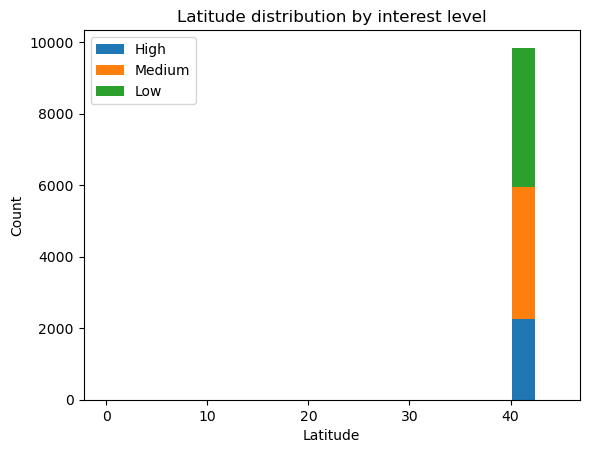

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 1.]]),
 array([0.00000000e+00, 7.43396667e-03, 1.48679333e-02, ...,
        4.45889321e+01, 4.45963660e+01, 4.46038000e+01]),
 <a list of 3 BarContainer objects>)

(40.1, 41.1)

Text(0.5, 1.0, 'Latitude distribution by interest level')

Text(0.5, 0, 'Latitude')

Text(0, 0.5, 'Count')

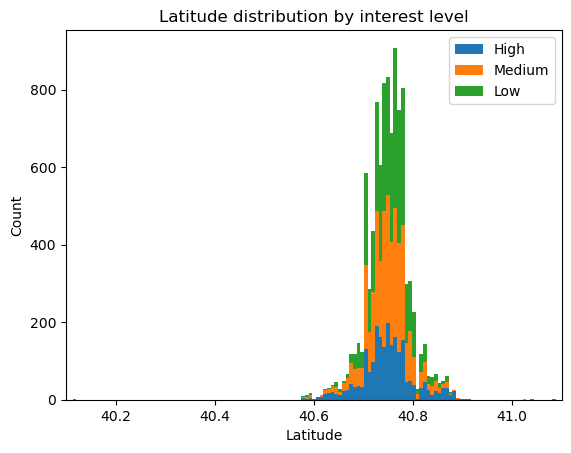

In [69]:
plt.hist([train_df[train_df['interest_level'] == 'high']['latitude'], train_df[train_df['interest_level'] == 'medium']['latitude'], train_df[train_df['interest_level'] == 'low']['latitude']], bins=6000, stacked=True, label=['High', 'Medium', 'Low'])
plt.xlim(40.1, 41.1)
plt.legend()
plt.title('Latitude distribution by interest level')
plt.xlabel('Latitude')
plt.ylabel('Count')
plt.show()

In [72]:
train_df['longitude'].tail(10)
min(train_df['longitude'])

9836   -73.9399
9837   -73.9913
9838   -74.0151
9839   -73.9804
9840   -73.9487
9841   -73.9849
9842   -74.0155
9843   -73.9836
9844   -73.9808
9845   -73.9874
Name: longitude, dtype: float64

-75.1773

(array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 1.]]),
 array([-7.51773000e+01, -7.51647705e+01, -7.51522409e+01, ...,
        -2.50591000e-02, -1.25295500e-02,  0.00000000e+00]),
 <a list of 3 BarContainer objects>)

(-74.25, -73.3)

Text(0.5, 1.0, 'Longitude distribution by interest level')

Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'Count')

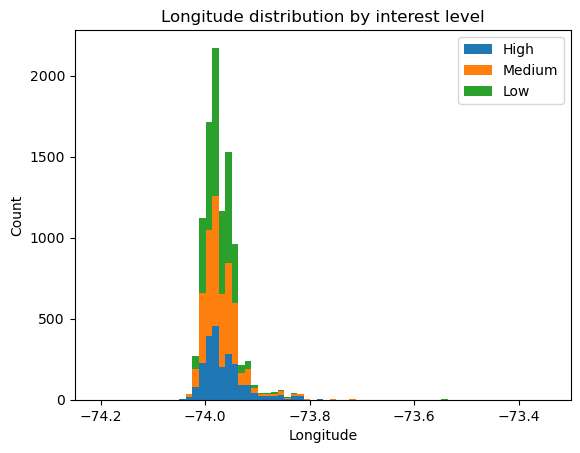

In [74]:
plt.hist([train_df[train_df['interest_level'] == 'high']['longitude'], train_df[train_df['interest_level'] == 'medium']['longitude'], train_df[train_df['interest_level'] == 'low']['longitude']], bins=6000, stacked=True, label=['High', 'Medium', 'Low'])
plt.xlim(-74.25, -73.3)
plt.legend()
plt.title('Longitude distribution by interest level')
plt.xlabel('Longitude')
plt.ylabel('Count')
plt.show()

(array([[1.064e+03, 7.670e+02, 3.420e+02, 7.300e+01, 0.000e+00],
        [2.758e+03, 1.945e+03, 1.003e+03, 2.540e+02, 2.000e+00],
        [4.843e+03, 3.064e+03, 1.532e+03, 3.730e+02, 3.400e+01]]),
 array([0. , 1.2, 2.4, 3.6, 4.8, 6. ]),
 <a list of 3 BarContainer objects>)

(0.0, 6.0)

Text(0.5, 1.0, 'Bedrooms distribution by interest level')

Text(0.5, 0, 'Bedrooms')

Text(0, 0.5, 'Count')

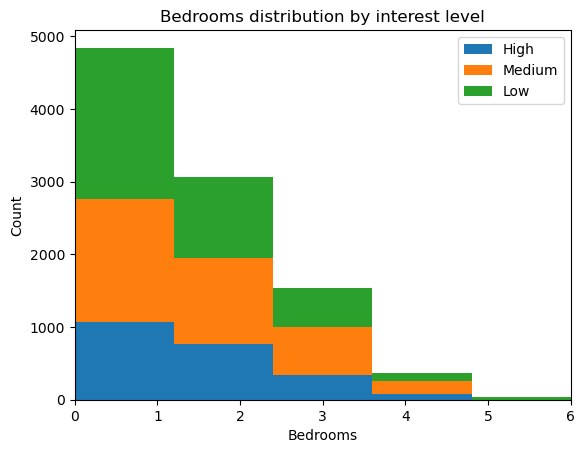

In [76]:
plt.hist([train_df[train_df['interest_level'] == 'high']['bedrooms'], train_df[train_df['interest_level'] == 'medium']['bedrooms'], train_df[train_df['interest_level'] == 'low']['bedrooms']], bins=5, stacked=True, label=['High', 'Medium', 'Low'])
plt.xlim(0,6)
plt.legend()
plt.title('Bedrooms distribution by interest level')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

(array([[2.000e+03, 2.380e+02, 7.000e+00, 1.000e+00, 0.000e+00],
        [5.104e+03, 8.310e+02, 2.500e+01, 2.000e+00, 0.000e+00],
        [8.188e+03, 1.494e+03, 1.380e+02, 2.200e+01, 4.000e+00]]),
 array([0. , 1.2, 2.4, 3.6, 4.8, 6. ]),
 <a list of 3 BarContainer objects>)

(0.0, 6.0)

Text(0.5, 1.0, 'Bathrooms distribution by interest level')

Text(0.5, 0, 'Bathrooms')

Text(0, 0.5, 'Count')

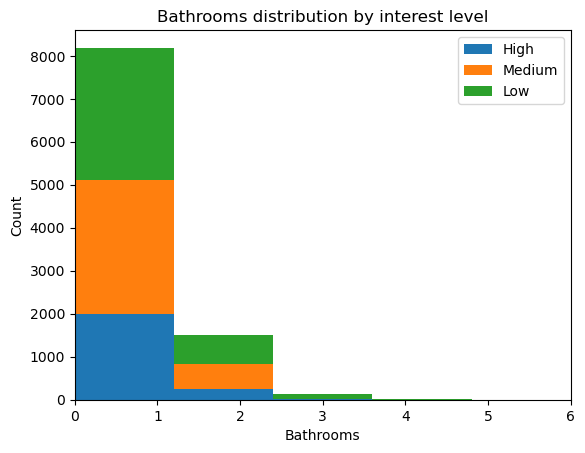

In [79]:
plt.hist([train_data[train_data['interest_level'] == 'high']['bathrooms'], train_data[train_data['interest_level'] == 'medium']['bathrooms'], train_data[train_data['interest_level'] == 'low']['bathrooms']], bins=5, stacked=True, label=['High', 'Medium', 'Low'])
plt.xlim(0,6)
plt.legend()
plt.title('Bathrooms distribution by interest level')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.show()